In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

# Random Forests

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

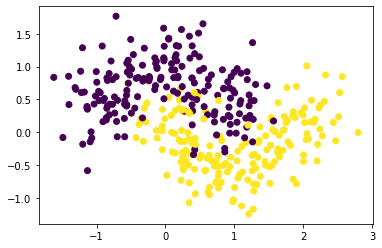

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

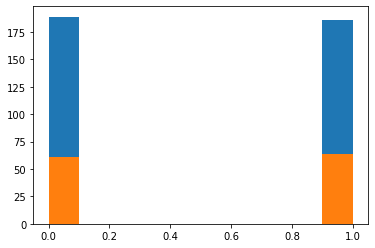

In [5]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

```python
BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
```

i

```python
RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

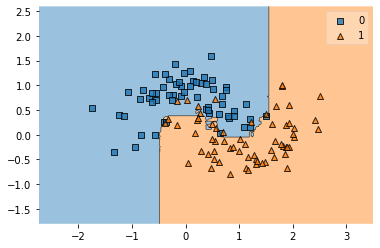

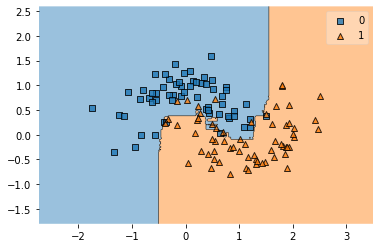

In [10]:
models = [
    BaggingClassifier(
        DecisionTreeClassifier(max_leaf_nodes=16, random_state=42), 
        n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42),
    RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
]

for model in models:
    model.fit(X_train, y_train)
    plot_decision_regions(X_test, y_test, model)
    plt.show()

# Ciekawostka - Extra-Trees 


* Gdy budujemy kolejne drzewa  w losowym lesie, w każdym węźle rozpatrywany jest losowy podzbiór elementów do podziału. 

* Możliwe jest stworzenie drzewa jeszcze bardziej losowego, wykorzystując losowe podziały dla każdej cechy, zamiast szukać najlepszych możliwych podziału (jak w przypadku zwykłych drzew decyzyjnych).

* Taki las losowy nazywa się **Extremely Randomized Trees** (lub **Extra-Trees** w skrócie). 

* Możesz utworzyć klasyfikator **Extremely Randomized Trees** za pomocą klasy **ExtraTreesClassifier** z Scikit-Learn. 

* Jego API jest identyczne z klasą RandomForestClassifier. 


# Zad.

Naucz 

```python
ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

i porównaj z powyższymi.

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

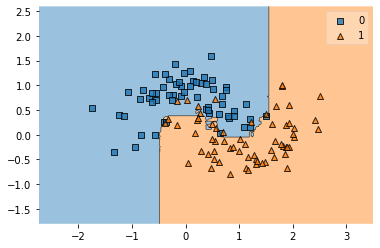

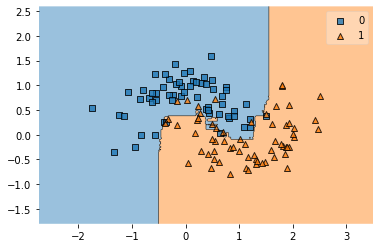

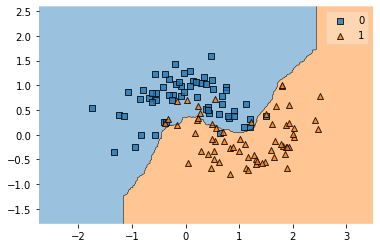

In [12]:
models.append(ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42))
for model in models:
    model.fit(X_train, y_train)
    plot_decision_regions(X_test, y_test, model)
    plt.show()